<a href="https://colab.research.google.com/github/lungnahahd/ML_Prac/blob/main/AzureCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
print('Hello world')

Hello world


In [19]:
import requests
import json
import matplotlib.pyplot as plt
from PIL import Image
from io import BytesIO
from PIL import Image, ImageDraw, ImageFont # 이미지를 수정할 수 있도록 해주는 Python 제공 패키지

In [2]:
# 내 계정 Key 값
subscription_key = "Key 값"

In [3]:
# 내 계정 vision 주소 
vision_base_url = "계정엔드포인트 vision/v2.0/"

## Make Senetence

In [4]:
# 최종적으로 호출할 주소가 완성 
analyze_url = vision_base_url + "analyze"

In [7]:
# 분석에 활용될 이미지 주소(인터넷에 있는 사진을 이용할 경우는 이미지 주소를 복사해서 사용하기)
image_url = "https://t1.daumcdn.net/cfile/tistory/277AC13856ED670932"

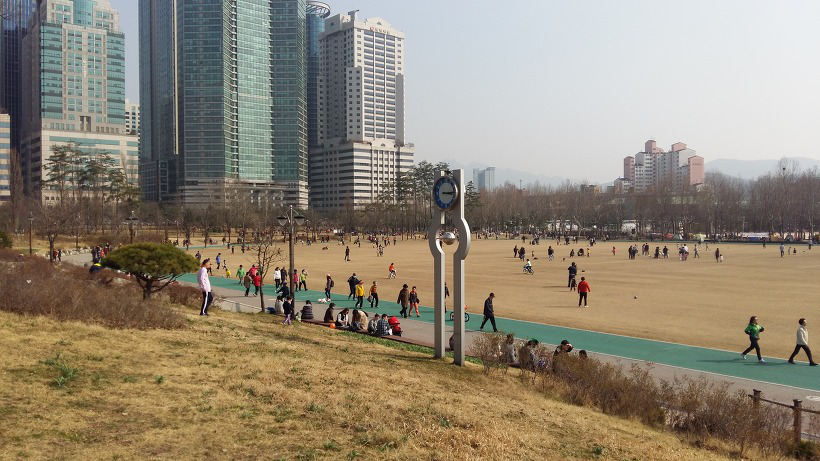

In [8]:
# 이미지를 주소에서 잘 불러왔는지 확인하는 코드
# 가끔 주소 자체에서 이미지를 차단하는 경우도 있으니 주의!
image = Image.open(BytesIO(requests.get(image_url).content))
image

In [9]:
# 정보들을 세팅하는 코드
headers = {'Ocp-Apim-Subscription-Key': subscription_key }
params  = {'visualFeatures': 'Categories,Description,Color'}
data    = {'url': image_url}

In [10]:
# 실제로 클라우드에 요청하고 결과를 받는 코드 !!!
# 결과는 response 변수에 담겨 있음
response = requests.post(analyze_url, headers=headers, params=params, json=data)
response.raise_for_status()

In [11]:
# 분석 결과를 확인
## 아래 나오는 confidence가 정확도를 의미!! -> 이를 기준으로 성능 평가 가능
## description 이 간단하게 설명
### 아래 나오는 것들은 인식한 결과들을 차례로 보여줌
analysis = response.json()
analysis

{'categories': [{'name': 'abstract_', 'score': 0.00390625},
  {'name': 'others_', 'score': 0.00390625},
  {'detail': {'landmarks': []}, 'name': 'outdoor_', 'score': 0.0234375}],
 'color': {'accentColor': '886B43',
  'dominantColorBackground': 'Brown',
  'dominantColorForeground': 'White',
  'dominantColors': ['White', 'Grey', 'Brown'],
  'isBWImg': False,
  'isBwImg': False},
 'description': {'captions': [{'confidence': 0.9625997106332559,
    'text': 'a group of people in a city'}],
  'tags': ['grass',
   'outdoor',
   'building',
   'group',
   'people',
   'city',
   'game',
   'field',
   'park',
   'walking',
   'standing',
   'water',
   'kite',
   'man',
   'large',
   'riding',
   'young',
   'flying',
   'playing',
   'sheep',
   'street']},
 'metadata': {'format': 'Jpeg', 'height': 461, 'width': 820},
 'requestId': 'efe1ad46-3746-4d28-af9a-91cd4feda3dd'}

In [12]:
# 결과를 활용
image_caption = analysis["description"]["captions"][0]["text"].capitalize()
image_caption

'A group of people in a city'

## Obeject Detection

In [13]:
# Url에 해당 부분을 추가하면서 Obeject detection 기능을 사용 가능
objectDection_url = vision_base_url + "detect"

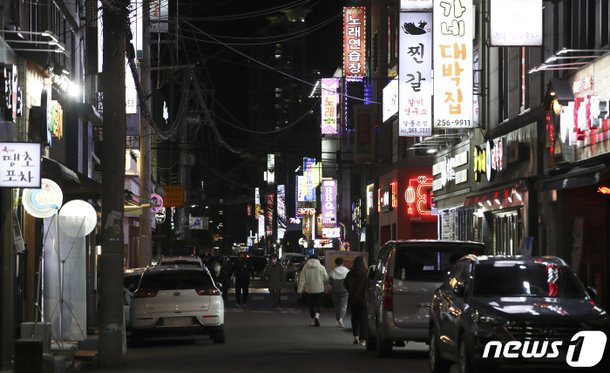

In [24]:
image_url='https://thumbnews.nateimg.co.kr/view610///news.nateimg.co.kr/orgImg/na/2021/02/15/4621513_high.jpg'
object_image = requests.get(image_url)
img = Image.open(BytesIO(object_image.content))
img

In [25]:
headers = {'Ocp-Apim-Subscription-Key': subscription_key }
#params  = {'visualFeatures': 'Categories,Description,Color'}
data    = {'url': image_url}

In [26]:
response = requests.post(objectDection_url, headers=headers, params=params, json=data)
response.raise_for_status()

In [27]:
dectionResult = response.json()
dectionResult # 결과를 Json 형식으로 변환

{'metadata': {'format': 'Jpeg', 'height': 373, 'width': 610},
 'objects': [{'confidence': 0.578,
   'object': 'person',
   'rectangle': {'h': 72, 'w': 28, 'x': 295, 'y': 251}},
  {'confidence': 0.507,
   'object': 'Van',
   'parent': {'confidence': 0.837,
    'object': 'car',
    'parent': {'confidence': 0.848,
     'object': 'Land vehicle',
     'parent': {'confidence': 0.848, 'object': 'Vehicle'}}},
   'rectangle': {'h': 84, 'w': 102, 'x': 124, 'y': 260}},
  {'confidence': 0.798,
   'object': 'car',
   'parent': {'confidence': 0.81,
    'object': 'Land vehicle',
    'parent': {'confidence': 0.81, 'object': 'Vehicle'}},
   'rectangle': {'h': 122, 'w': 123, 'x': 361, 'y': 234}},
  {'confidence': 0.661,
   'object': 'taxi',
   'parent': {'confidence': 0.823,
    'object': 'car',
    'parent': {'confidence': 0.825,
     'object': 'Land vehicle',
     'parent': {'confidence': 0.825, 'object': 'Vehicle'}}},
   'rectangle': {'h': 125, 'w': 179, 'x': 430, 'y': 245}}],
 'requestId': '8a6fb9a4

In [28]:
draw = ImageDraw.Draw(img)

def CreatImage(dectionResult):
    
    objects = dectionResult['objects'] # 결과 중 object 항목을 추출
    
    for obj in objects: # 반복문으로 인식된 객체 정보를 받기
        print(obj)
        
        rect = obj['rectangle'] # 이미지에 사각형을 치기 위해 좌표계를 가져오는 과정
        # 한 사각형은 2개의 점, 총 4개의 좌표 정보를 가지고 그릴 수 있음
        x = rect['x']
        y = rect['y']
        w = rect['w']
        h = rect['h']

        # 실질적으로 사각형을 그리는 부분
        # x와 y, 그리고 이와 다른 점이 얼마나 떨어졌는지 정보를 이용해서 사각형을 그리기
        draw.rectangle(((x, y), (x + w, y + h)), outline='red')

        # Font location 
        fontX = x - 18
        fontY = y

        objectName = obj['object']
        draw.text((fontX, fontY), objectName, fill='red')


In [29]:
CreatImage(dectionResult)

{'rectangle': {'x': 295, 'y': 251, 'w': 28, 'h': 72}, 'object': 'person', 'confidence': 0.578}
{'rectangle': {'x': 124, 'y': 260, 'w': 102, 'h': 84}, 'object': 'Van', 'confidence': 0.507, 'parent': {'object': 'car', 'confidence': 0.837, 'parent': {'object': 'Land vehicle', 'confidence': 0.848, 'parent': {'object': 'Vehicle', 'confidence': 0.848}}}}
{'rectangle': {'x': 361, 'y': 234, 'w': 123, 'h': 122}, 'object': 'car', 'confidence': 0.798, 'parent': {'object': 'Land vehicle', 'confidence': 0.81, 'parent': {'object': 'Vehicle', 'confidence': 0.81}}}
{'rectangle': {'x': 430, 'y': 245, 'w': 179, 'h': 125}, 'object': 'taxi', 'confidence': 0.661, 'parent': {'object': 'car', 'confidence': 0.823, 'parent': {'object': 'Land vehicle', 'confidence': 0.825, 'parent': {'object': 'Vehicle', 'confidence': 0.825}}}}


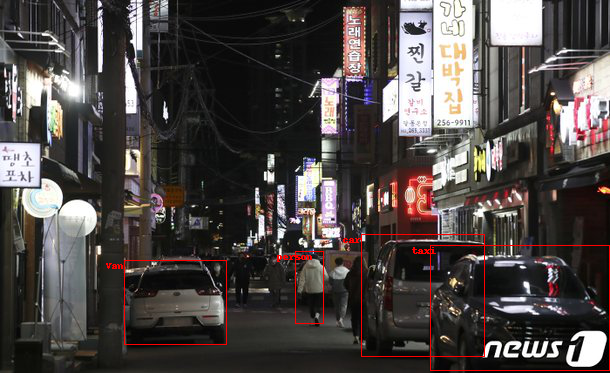

In [30]:
img.show()
img